[('A', 'C'), ('A', 'B'), ('A', 'F'), ('C', 'D'), ('B', 'D'), ('D', 'E'), ('E', 'F')]
[]


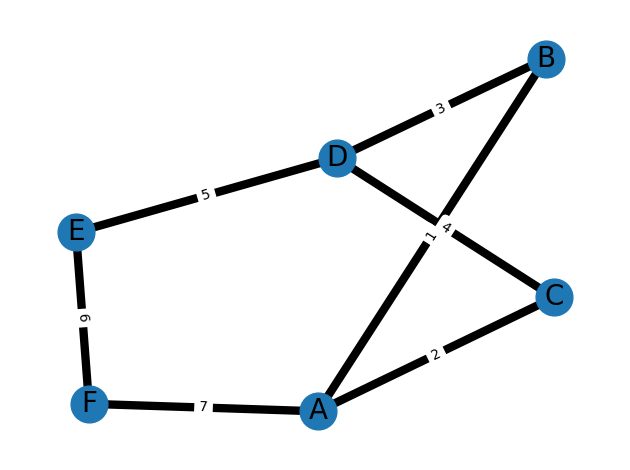

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
import json
import math

G = nx.Graph()


file = open('dijkstra.json')
data = json.load(file)
for i in data['vertices']:
    vertex = i['name']
    vertex_name = i['name']
    edges = i['edges']
    for edge in edges:
        edge_name = edge['name']
        edge_weight = edge['weight']
        G.add_edge(vertex_name, edge_name, weight=edge_weight)



#G.add_edge("a", "b", weight=0.6)
#G.add_edge("a", "c", weight=0.2)
#G.add_edge("c", "d", weight=0.1)
#G.add_edge("c", "e", weight=0.7)
#G.add_edge("c", "f", weight=0.9)
#G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
print(elarge)
print(esmall)

#pos = nx.spring_layout(G, seed=6)  # positions for all nodes - seed for reproducibility
#pos = nx.spring_layout(G, k=5/math.sqrt(G.order()), iterations=20)
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()